[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [1]:
import anon
import elle.sections
import elle.beam2d
import emme as em
geom_template = elle.beam2d.transform_no2(elle.beam2d.geom_no1,_jit=True)
beam_template = elle.beam2d.resp_no1

An `Assembler` is an object with an `.assemble()` and optionally a `.compose()` method

In [2]:
# Create a model Assembler
model = em.SkeletalModel(ndm=2,ndf=3)

# Define problem parameters
I  = model.param("I")
P1 = model.param("P1")

# Define model components
base_elem  = beam_template(A=150.0, E=29e3, I=I)
beam_model = geom_template(base_elem)

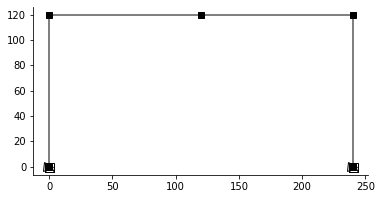

In [3]:
# Set up nodes
ft = 12
B, H = 20.*ft, 10.*ft
model.node("1",  0.,  0.)
model.node("2",  0.,  H )
model.node("3", B/2,  H )
model.node("4",  B ,  H )
model.node("5",  B ,  0.)

model.beam("a", "1", "2", elem=beam_model)
model.beam("b", "2", "3", elem=beam_model)
model.beam("c", "3", "4", elem=beam_model)
model.beam("d", "4", "5", elem=beam_model)

model.boun("1", [1,1,1])
model.boun("5", [1,1,1])

model.load("2", P1, dof="x")

em.plot_structure(model);

In [4]:
f = model.compose()

In [5]:
#f(900,-30)

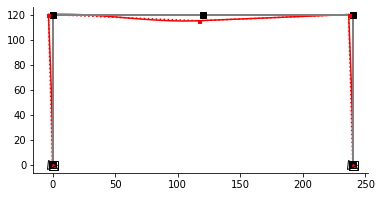

In [6]:
fig, ax = em.plot_displ(model, f(900,-30),scale=10)

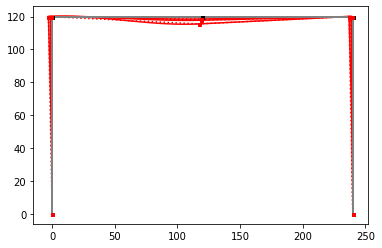

In [7]:
for moi in [1e3, 2e3, 3e3]:
    em.plot_displ(model, f(moi, -30.0), ax=ax, scale=10)

In [8]:
df = anon.diff.jacfwd(f, None, (0,1), squeeze=False)

In [9]:
df

<function anon.diff._jacfwd.<locals>.jacobian(*args, **kwds)>

In [11]:
df(100., 20.)

(DeviceArray([[-1.98620699e-02],
              [ 5.73915130e-10],
              [ 2.48275864e-04],
              [-1.98620690e-02],
              [-2.97931034e-02],
              [ 2.48275862e-04],
              [-1.98620680e-02],
              [-5.73915130e-10],
              [ 2.48275860e-04]], dtype=float64),
 DeviceArray([[ 9.93241331e-02],
              [ 2.87156885e-09],
              [-1.24146551e-03],
              [ 9.93103448e-02],
              [ 1.48965517e-01],
              [-1.24137931e-03],
              [ 9.92965565e-02],
              [-2.87156885e-09],
              [-1.24129312e-03]], dtype=float64))